In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns 
sns.set_palette("bright")
data=pd.read_csv('data_clear.csv',index_col=0)

data=pd.DataFrame(data)
data


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [2]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']

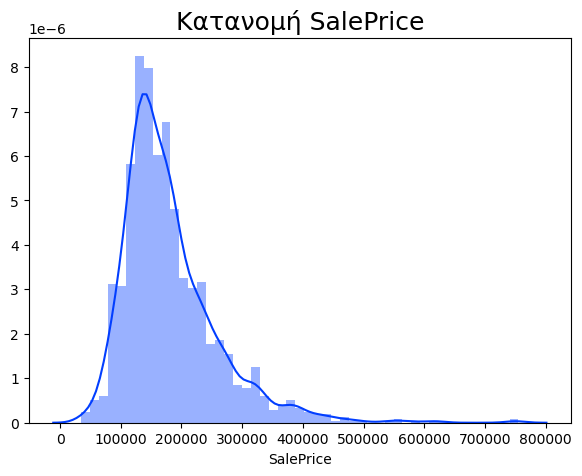

In [3]:
plt.figure(figsize=(7,5))
sns.distplot(y);
plt.title('Κατανομή SalePrice',fontsize=18);

# Corrolaiton

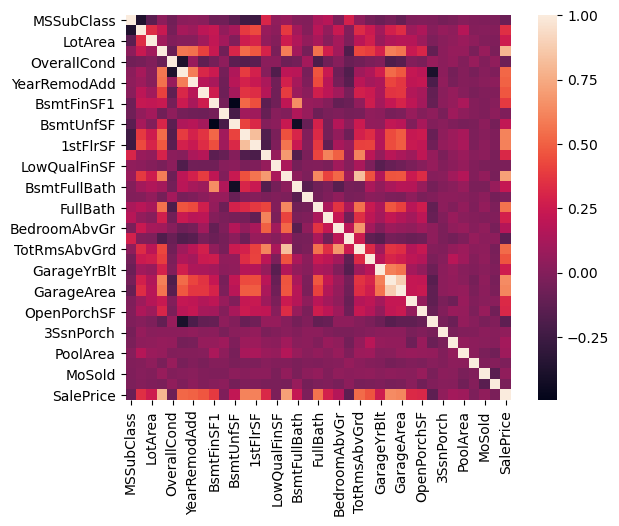

In [4]:
corr = data.corr()
plt.subplots(figsize=(7,5))
sns.heatmap(corr,  square=True,);


In [5]:
# θετικη συσχειση
frame=corr['SalePrice'].sort_values(ascending=False).head(10).to_frame()
frame

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [6]:
print(frame.to_latex())

\begin{tabular}{lr}
\toprule
{} &  SalePrice \\
\midrule
SalePrice    &   1.000000 \\
OverallQual  &   0.790982 \\
GrLivArea    &   0.708624 \\
GarageCars   &   0.640409 \\
GarageArea   &   0.623431 \\
TotalBsmtSF  &   0.613581 \\
1stFlrSF     &   0.605852 \\
FullBath     &   0.560664 \\
TotRmsAbvGrd &   0.533723 \\
YearBuilt    &   0.522897 \\
\bottomrule
\end{tabular}



In [7]:
#αρνητικη συσχετιση
frame=corr['SalePrice'].sort_values(ascending=True).head(9).to_frame()
frame

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [8]:
print(frame.to_latex())

\begin{tabular}{lr}
\toprule
{} &  SalePrice \\
\midrule
KitchenAbvGr  &  -0.135907 \\
EnclosedPorch &  -0.128578 \\
MSSubClass    &  -0.084284 \\
OverallCond   &  -0.077856 \\
YrSold        &  -0.028923 \\
LowQualFinSF  &  -0.025606 \\
MiscVal       &  -0.021190 \\
BsmtHalfBath  &  -0.016844 \\
BsmtFinSF2    &  -0.011378 \\
\bottomrule
\end{tabular}



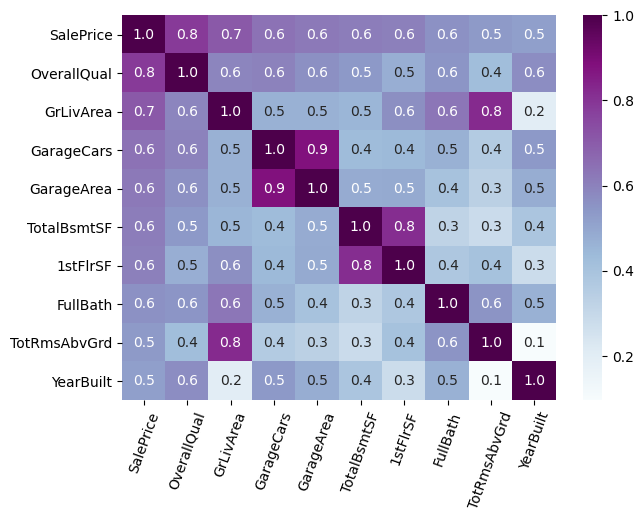

In [9]:
best_corr_columns=corr['SalePrice'].sort_values(ascending=False).head(10).index
best_corr=data[best_corr_columns].corr()
plt.figure(figsize=(7,5))
sns.heatmap(best_corr,annot=True,fmt='.1f',cmap="BuPu")
plt.xticks(rotation=70);


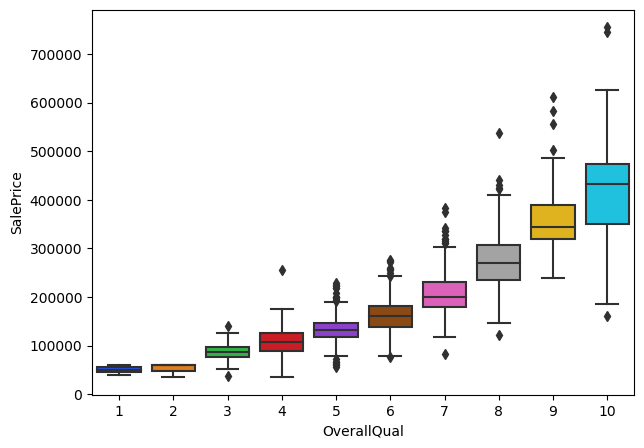

In [10]:
plt.subplots(figsize=(7,5))
sns.boxplot(data['OverallQual'],data['SalePrice']);


Tιμη πωλησης και ποιοτητα ακινητου εχουν ισχυρη (εκθετικη) συσχετιση.

# OUTLIERS

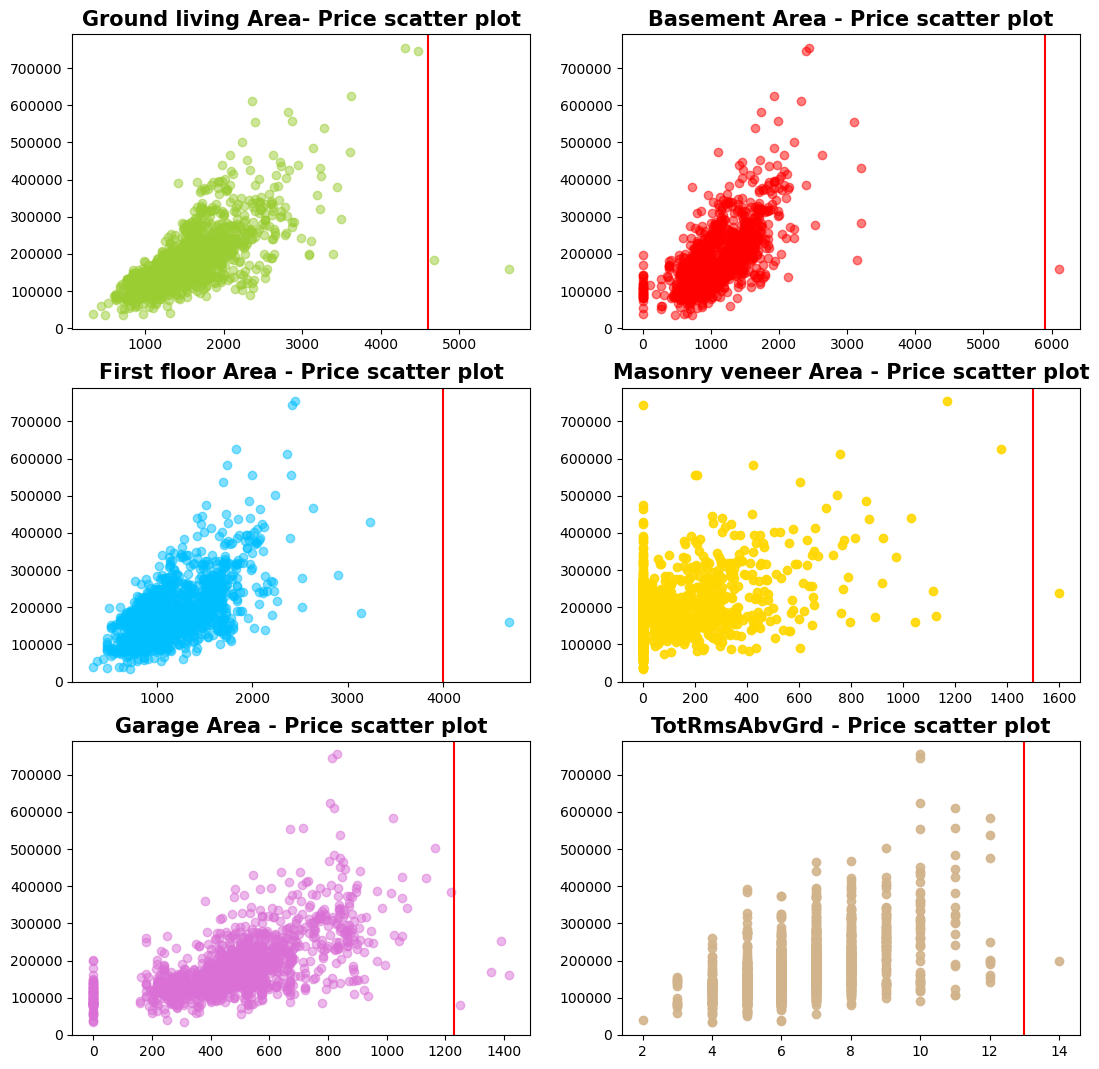

In [11]:
fig = plt.figure(figsize=(13,13))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=data['GrLivArea'], y=data['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=data['TotalBsmtSF'], y=data['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=data['1stFlrSF'], y=data['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=data['MasVnrArea'], y=data['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=data['GarageArea'], y=data['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=data['TotRmsAbvGrd'], y=data['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

In [12]:
b=data.shape[0]
data=data[(data['GrLivArea'] < 4600) & (data['MasVnrArea'] < 1500) & (data['TotalBsmtSF'] <5900 ) 
         &(data['1stFlrSF']<4000) &(data['GarageArea']<1230) &(data['TotRmsAbvGrd']<13)
         
         ]
a=data.shape[0]
print('διαγραφηκαν', b-a,'ακραιες τιμες')

διαγραφηκαν 7 ακραιες τιμες


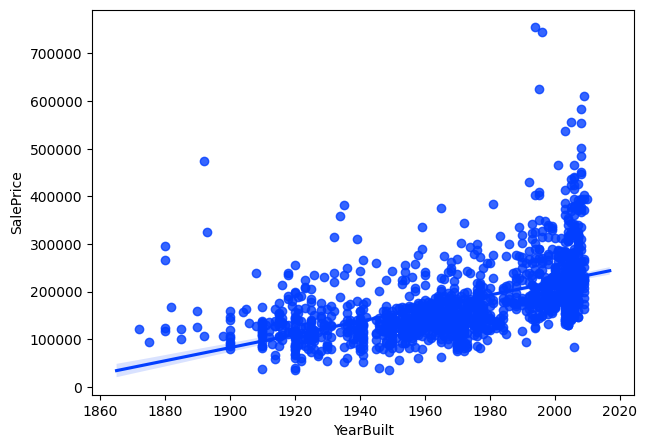

In [13]:
plt.subplots(figsize=(7,5))
sns.regplot(data['YearBuilt'],data['SalePrice']);

  # ΜΕΤΑΣΧΗΜΑΤΙΣΜΟΣ ΔΕΔΟΜΕΝΩΝ

In [14]:
data['SalePrice'] = np.log(data['SalePrice'])

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


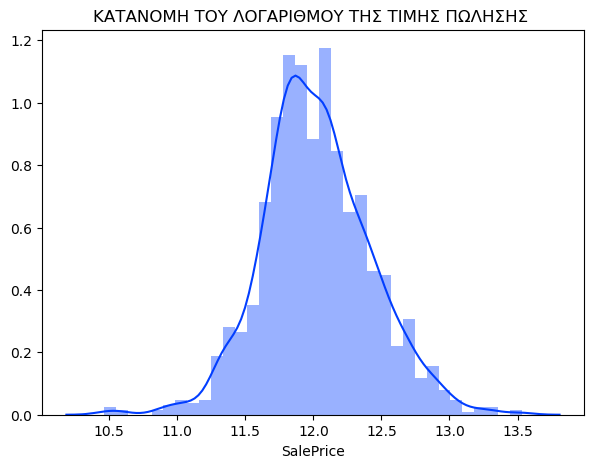

In [15]:

plt.figure(figsize=(7,5))
plt.title('ΚΑΤΑΝΟΜΗ ΤΟΥ ΛΟΓΑΡΙΘΜΟΥ ΤΗΣ ΤΙΜΗΣ ΠΩΛΗΣΗΣ ')
sns.distplot(data['SalePrice']);

In [16]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [17]:
object_columns_df=data.select_dtypes(include=['object']) #ΠΟΙΟΤΙΚΑ ΧΑΡΑΚΤΗΡΙΣΤΙΚΑ
numerical_columns_df =data.select_dtypes(exclude=['object']) #ΠΟΣΟΤΙΚΑ ΧΑΡΑΚΤΗΡΙΣΤΙΚΑ

### ΠΟΙΟΤΙΚΑ ΧΑΡΑΚΤΗΡΙΣΤΙΚΑ  ΚΑΙ ΟΙ ΤΙΜΕΣ ΠΟΥ ΠΑΙΡΝΟΥΝ

In [18]:
for c in object_columns_df.columns:
    print(c,object_columns_df[c].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['None' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdn

### Για τις ποιοτικες μεταβλητες που  υπάρχει τάξη (ordinal) μεταξύ των κατηγοριών, φτιαχνουμε ενα map ,σύμφωνα  με την περιγραφή των δεδομένων (data_description.txt)

In [19]:
ordinal_map={
     'Lvl':3,'Bnk':2,'HLS':1,'Low':0,
    
     'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'Po':1,'None':0,
    
     'Y':1,'N':0,
    
    'Reg':3,'IR1':2,'IR2':1,'IR3':0,
    
    "GLQ" : 6, "ALQ" : 5,"BLQ" : 4,"Rec" : 3,"LwQ": 2, "Unf" : 1, "None" : 0,
    
    "Gd" : 4,"Av": 3, "Mn" : 2,   "No" : 1,"None" : 0,
  
    
    'Sev':2,'Mod':1, 'Gtl':0,
    
   
            }


In [20]:
ordinal_columns=[  'LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure',
                   'HeatingQC', 'CentralAir','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC',
                     'BsmtFinType1','BsmtFinType2'
                ]

for c in ordinal_columns:
    data[c]=data[c].map(ordinal_map)
    
PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
data['PavedDrive']=data['PavedDrive'].map(PavedDrive)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
np.unique(data[ordinal_columns].values.flatten())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### One hot encoder για το μετασχηματισμό των υπόλοιπων ποιοτικών μεταβλητών

In [22]:
object_columns_df=data.select_dtypes(include=['object'])

In [23]:
data=pd.get_dummies(data,columns=object_columns_df.columns)

In [24]:
data

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,3,0,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,3,3,0,6,8,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,2,3,0,7,5,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,2,3,0,7,5,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,2,3,0,8,5,2000,2000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,3,3,0,6,5,1999,2000,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,3,3,0,6,6,1978,1988,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,3,3,0,7,9,1941,2006,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,3,3,0,5,6,1950,1996,...,0,0,0,1,0,0,0,0,1,0


In [25]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

# Models

In [26]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']

### XGBoost

In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
xgbModel=xgb.XGBRegressor(objective='reg:squarederror',
                          booster='gbtree',
                          n_jobs=-1)
xgb_params={
    'max_depth':[3,5,10],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[1000,2500,4000,6000],
    'reg_lambda':[0.01,1,10],
    'min_child_weight':[1,5,10]
}


#### grid search για το xgboost ,με τις παραπάνω παραμέτρους,με 3-fold-cross validation.Το αφήνουμε σαν σχόλιο.Αποθηκεύσαμε το καλυτερο αποτέλεσμα του grid search σε ένα αρχείο!

In [28]:
# %time 
# xg_grid=GridSearchCV(xgbModel,param_grid=xgb_params,cv=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=10)
# xg_grid.fit(X,y)

### save grid search results

In [29]:
# import json
# class NumpyEncoder(json.JSONEncoder):
#     def default(self, obj):
#         if isinstance(obj, np.ndarray):
#             return obj.tolist()
#         return json.JSONEncoder.default(self, obj)
# file = open("xg_grid_results.json", "w")
# json.dump(xg_grid.cv_results_, file,cls=NumpyEncoder)

# file=open("xg_grid_results.json", "r")
# json.load(file)

In [30]:
import json
f=open("xg_grid_results.json", "r")
xg_grid_results=json.load(f)


### Αποθήκευση του καλύτερου αποτελέσματος του grid search

In [31]:
# xgb_best_model=xg_grid.best_estimator_
# import pickle
# xgboost_filename = 'xgboost_best_model.sav'
# pickle.dump(xgb_best_model, open(xgboost_filename, 'wb'))

In [32]:
import pickle
xgboost_filename = 'xgboost_best_model.sav'
xgb_best_model=pickle.load(open(xgboost_filename, 'rb'))
xgb_best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan, n_estimators=4000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

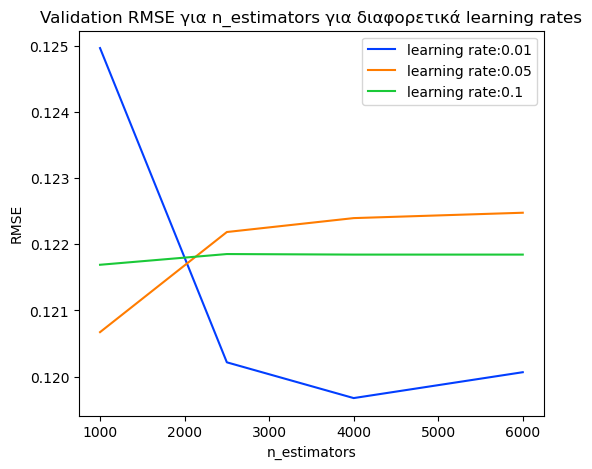

In [33]:
err=[]
cvres = xg_grid_results
la=xgb_params['learning_rate']
n_estimators=xgb_params['n_estimators']

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if params["max_depth"]==3 and params['min_child_weight']==1 and params['reg_lambda']==1:
        err.append(np.sqrt(-mean_score))


err=np.array(err).reshape(len(la),len(n_estimators))
plt.figure(figsize=(6,5))
for err_arr, label in zip(err, la):
    sns.lineplot(n_estimators, err_arr, label=f'learning rate:{label}')

plt.title('Validation RMSE για n_estimators για διαφορετικά learning rates')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('RMSE');


### 10-Fold cross validation 

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
def rmse(y,y_pred):
    return mse(y,y_pred)**0.5

errors_test=[]
errors_train=[]
y_all=[]
i=0
kf=KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    i+=1
    xgb_best_model.fit(X_train,y_train)
    
    y_pred=xgb_best_model.predict(X_test)
    rmse_test=rmse(y_test,y_pred)
    errors_test.append(rmse_test)
    
    y_pred_train=xgb_best_model.predict(X_train)
    rmse_train=rmse(y_train,y_pred_train)
    errors_train.append(rmse_train)
    
    y_all.append([y_test,y_pred])
    print(f'cv:{i}, rmse_test:{rmse_test}, rmse_train:{rmse_train}')

cv:1, rmse_test:0.11287752298903043, rmse_train:0.05019757972367897
cv:2, rmse_test:0.1314528377292625, rmse_train:0.04840230464202868
cv:3, rmse_test:0.11664878890220401, rmse_train:0.050633995554940275
cv:4, rmse_test:0.16255211645017204, rmse_train:0.04924842309029093
cv:5, rmse_test:0.12812077155379012, rmse_train:0.048361495386033515
cv:6, rmse_test:0.11067714645151923, rmse_train:0.048875975907858644
cv:7, rmse_test:0.09572410883836698, rmse_train:0.04970171428064344
cv:8, rmse_test:0.11026791157116302, rmse_train:0.04957019936703469
cv:9, rmse_test:0.10647994610548234, rmse_train:0.04853594711896083
cv:10, rmse_test:0.09074909087910941, rmse_train:0.05168364727839709


In [35]:
train_test_rmse={'train set':np.mean(errors_train),
                 'validation set':np.mean(errors_test)}
table=pd.DataFrame(train_test_rmse,index=['RMSE'])
# print(table.to_latex())
table

,train set,validation set
RMSE,0.049521,0.116555


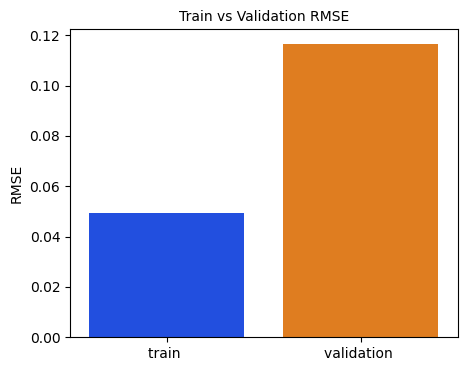

In [36]:
plt.figure(figsize=(5,4))
sns.barplot(x=['train ','validation '],y=[np.mean(errors_train),np.mean(errors_test)])

plt.title('Train vs Validation RMSE',fontsize=10)
plt.ylabel('RMSE',fontsize=10);

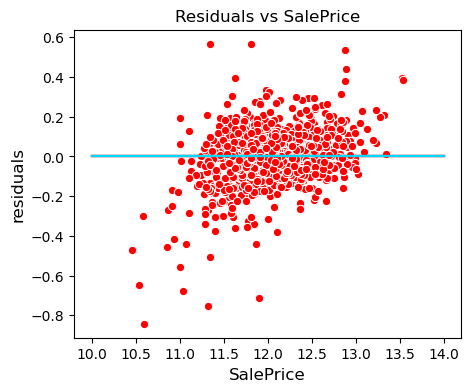

In [37]:
plt.figure(figsize=(5,4))
for y_test,y_pred in y_all:
    sns.scatterplot(y_test,y_test-y_pred,color='red')
    sns.lineplot([10,14],[0,0])

plt.title('Residuals vs SalePrice',fontsize=12)
plt.xlabel('SalePrice',fontsize=12)
plt.ylabel('residuals',fontsize=12);

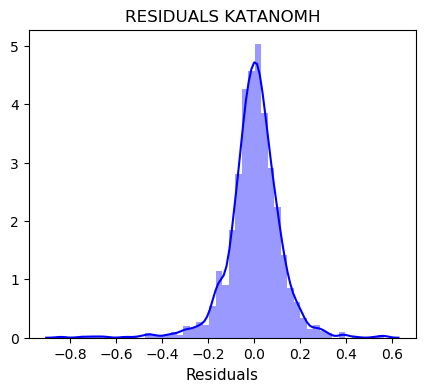

In [38]:
fitted_vals=[]
residuals=[]
for y_test,y_pred in y_all:
    fitted_vals.append(y_test)
    residuals.append((y_test.values-y_pred))
residuals=np.hstack(residuals).squeeze()

plt.figure(figsize=(5,4))

plt.title('RESIDUALS ΚΑΤΑΝΟΜΗ',fontsize=12)
sns.distplot(residuals,color='blue')
plt.xlabel('Residuals',fontsize=11);


# Feuature importance

0.99999994

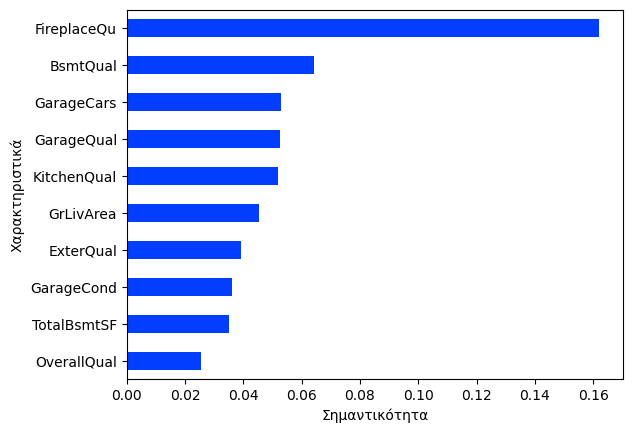

In [39]:
imp=pd.Series(xgb_best_model.feature_importances_,index=X.columns)
imp_frame=pd.concat([imp.sort_values()]).tail(10)
imp_frame.plot(kind='barh');
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά');
np.sum(xgb_best_model.feature_importances_)

### Gradient  Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbModel=GradientBoostingRegressor(loss='ls',
                                  criterion='mse')

gb_params={
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,10],
    'n_estimators':[1000,2500,4000,6000],
    'min_samples_split':[2,5,10]
}

##### grid search για το gradient boost ,με τις παραπάνω παραμέτρους.Το αφήνουμε σαν σχόλιο.Αποθηκεύσαμε το καλυτερο αποτέλεσμα του grid search σε ένα αρχείο!

In [41]:
# gb_grid=GridSearchCV(gbModel,param_grid=gb_params,cv=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=10)
# gb_grid.fit(X,y)


In [42]:
# file = open("gb_grid_results.json", "w")
# json.dump(gb_grid.cv_results_, file,cls=NumpyEncoder)

# file=open("gb_grid_results.json", "r")
# json.load(file)

In [43]:
f=open("gb_grid_results.json", "r")
gb_grid_results=json.load(f)


### Αποθήκευση του καλύερου αποτελέσματος του grid search

In [44]:
# gb_best_model=gb_grid.best_estimator_
# import pickle
# gboost_filename = 'gboost_best_model.sav'

# pickle.dump(gb_best_model, open(gboost_filename, 'wb'))

In [45]:
gboost_filename = 'gboost_best_model.sav'
gb_best_model=pickle.load(open(gboost_filename, 'rb'))
gb_best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

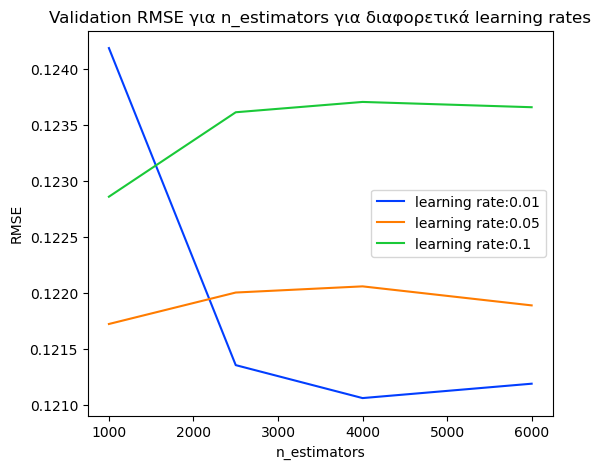

In [46]:
err=[]
cvres = gb_grid_results
la=gb_params['learning_rate']
n_estimators=gb_params['n_estimators']

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if params["max_depth"]==3 and params['min_samples_split']==2:
        err.append(np.sqrt(-mean_score))


err=np.array(err).reshape(len(la),len(n_estimators))
plt.figure(figsize=(6,5))
for err_arr, label in zip(err, la):
    sns.lineplot(n_estimators, err_arr, label=f'learning rate:{label}')

plt.title('Validation RMSE για n_estimators για διαφορετικά learning rates')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [47]:
errors_test=[]
errors_train=[]
y_all=[]
i=0
kf=KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    i+=1
    gb_best_model.fit(X_train,y_train)
    
    y_pred=gb_best_model.predict(X_test)
    rmse_test=rmse(y_test,y_pred)
    errors_test.append(rmse_test)
    
    y_pred_train=gb_best_model.predict(X_train)
    rmse_train=rmse(y_train,y_pred_train)
    errors_train.append(rmse_train)
    
    y_all.append([y_test,y_pred])
    print(f'cv:{i}, rmse_test:{rmse_test}, rmse_train:{rmse_train}')

cv:1, rmse_test:0.11364386493863111, rmse_train:0.0431837890725646
cv:2, rmse_test:0.13443397115366004, rmse_train:0.042772198961013336
cv:3, rmse_test:0.11619631573054179, rmse_train:0.044994886104591666
cv:4, rmse_test:0.15929763356819762, rmse_train:0.04395256437833348
cv:5, rmse_test:0.13192083699772075, rmse_train:0.042238027134439304
cv:6, rmse_test:0.11207454182061355, rmse_train:0.04403795216837804
cv:7, rmse_test:0.10092683034416118, rmse_train:0.04393755043517289
cv:8, rmse_test:0.11154106479467137, rmse_train:0.04422540175684599
cv:9, rmse_test:0.10607171715303003, rmse_train:0.04306352100661743
cv:10, rmse_test:0.09372491061008428, rmse_train:0.04491445304373612


In [48]:
print(np.mean(errors_train),np.mean(errors_test))

0.04373203440616928 0.1179831687111312


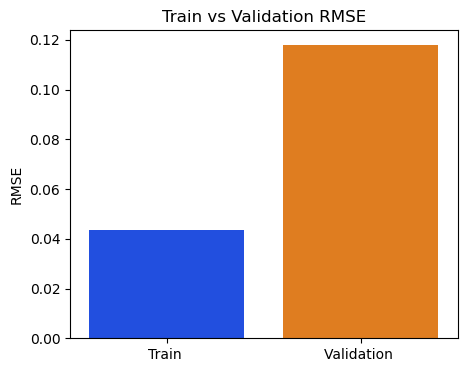

In [49]:
plt.figure(figsize=(5,4))
sns.barplot(x=['Train ','Validation '],y=[np.mean(errors_train),np.mean(errors_test)])
plt.title('Train vs Validation RMSE',fontsize=12)
plt.ylabel('RMSE',fontsize=10);

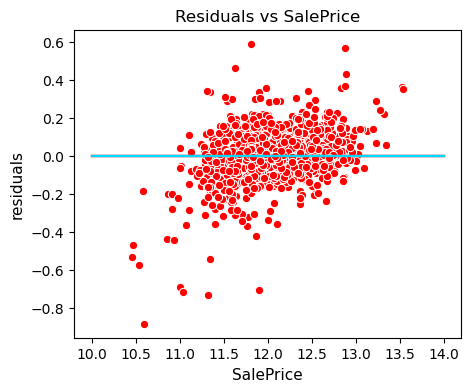

In [50]:
plt.figure(figsize=(5,4))
for y_test,y_pred in y_all:
    sns.scatterplot(y_test,y_test-y_pred,color='red')
    sns.lineplot([10,14],[0,0])

plt.title('Residuals vs SalePrice',fontsize=12)
plt.xlabel('SalePrice',fontsize=11)
plt.ylabel('residuals',fontsize=11);

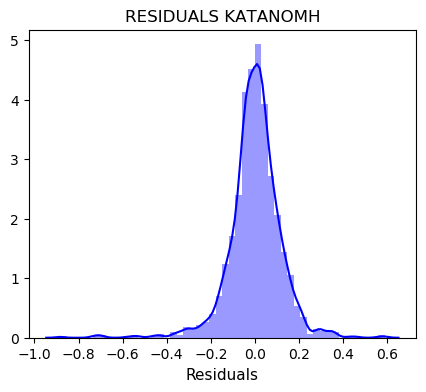

In [51]:
fitted_vals=[]
residuals=[]
for y_test,y_pred in y_all:
    fitted_vals.append(y_test)
    residuals.append((y_test.values-y_pred))
residuals=np.hstack(residuals).squeeze()

plt.figure(figsize=(5,4))

plt.title('RESIDUALS ΚΑΤΑΝΟΜΗ',fontsize=12)
sns.distplot(residuals,color='blue')
plt.xlabel('Residuals',fontsize=11);


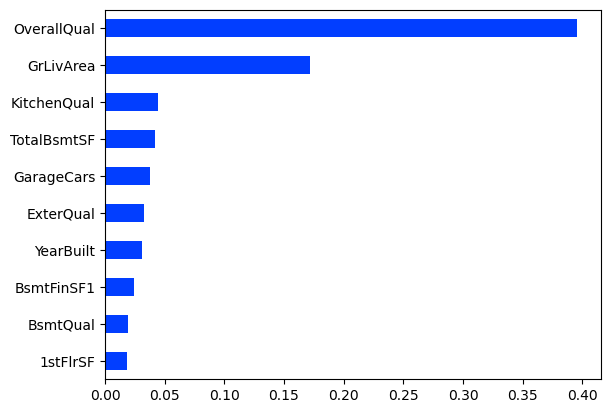

In [52]:
imp=pd.Series(gb_best_model.feature_importances_,index=X.columns)
imp_frame=pd.concat([imp.sort_values()]).tail(10)
imp_frame.plot(kind='barh');